<a href="https://colab.research.google.com/github/ruchitha11n/data-science-ExcelR/blob/main/Basic_statistics_level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  NAME:   **NADIPELLI RUCHITHA**

COURSE:   **DATA SCIENCE (3PM TO 5PM)**

INCHARGE: **PANAM SRAVANI**

**1. Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
file_path = "/content/sales_data_with_discounts.csv"  # Update with the correct path if needed
df = pd.read_csv(file_path)

In [ ]:
# Display basic info about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB
None


In [ ]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
print("\nNumerical Columns:", numerical_cols.tolist())


Numerical Columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_cols.tolist())


Categorical Columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


In [ ]:
mean_values = df[numerical_cols].mean()
median_values = df[numerical_cols].median()
mode_values = df[numerical_cols].mode().iloc[0]  # Take the first mode value

# Print results
print("\nMean Values:")
print(mean_values)

print("\nMedian Values:")
print(median_values)

print("\nMode Values:")
print(mode_values)


Mean Values:
Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

Median Values:
Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

Mode Values:
Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64


<Figure size 1200x600 with 0 Axes>

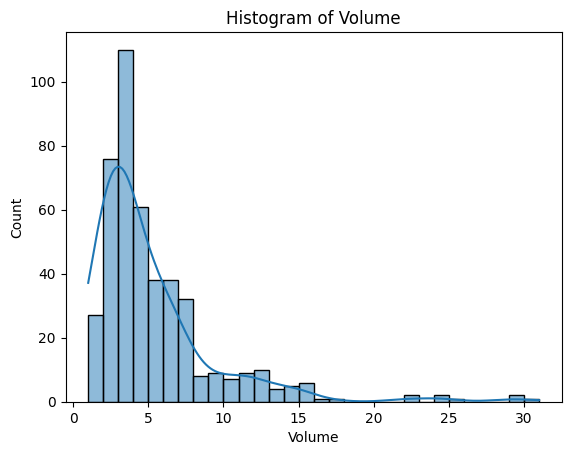

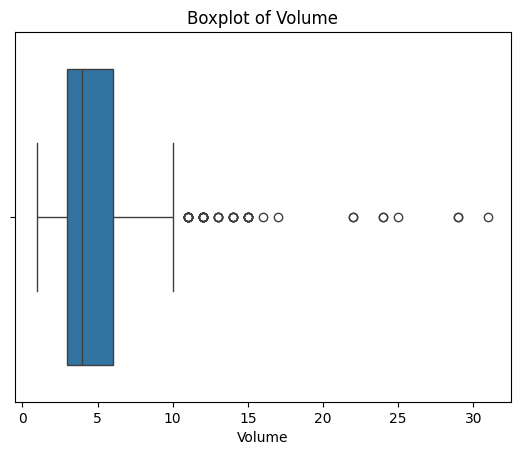

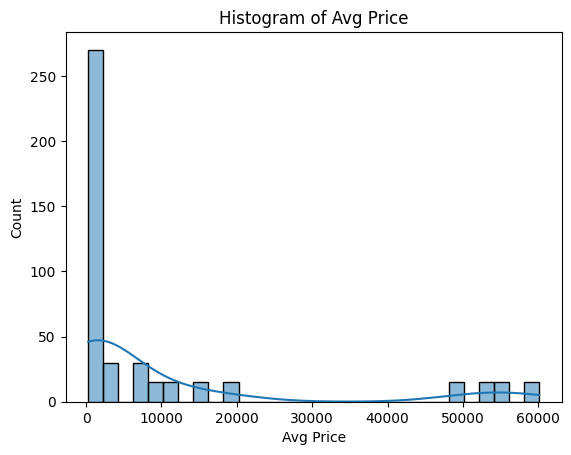

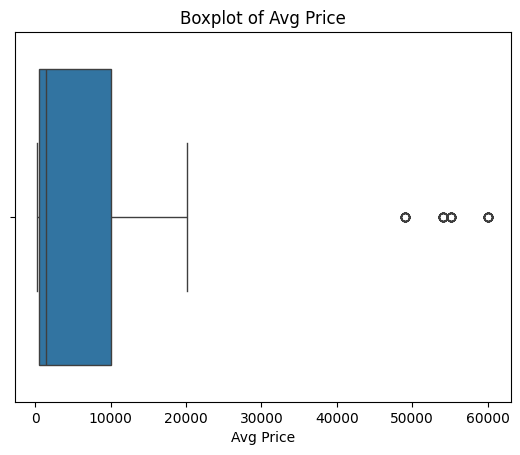

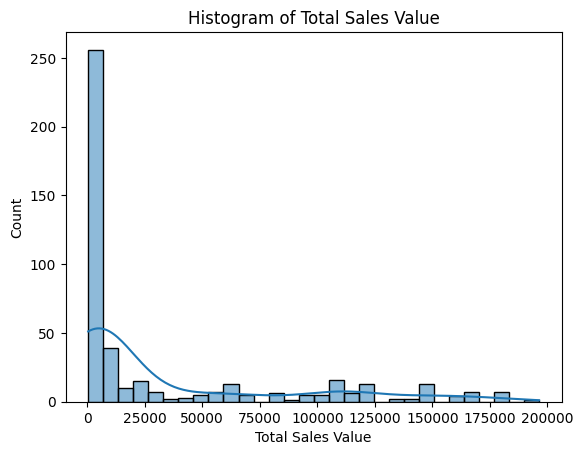

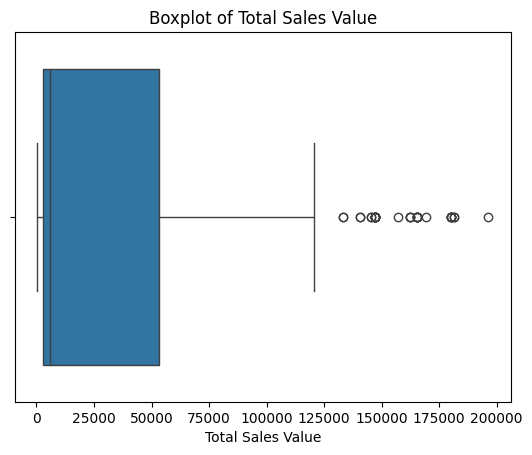

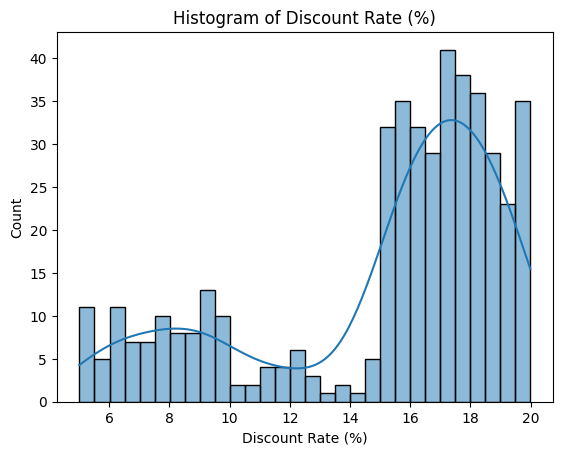

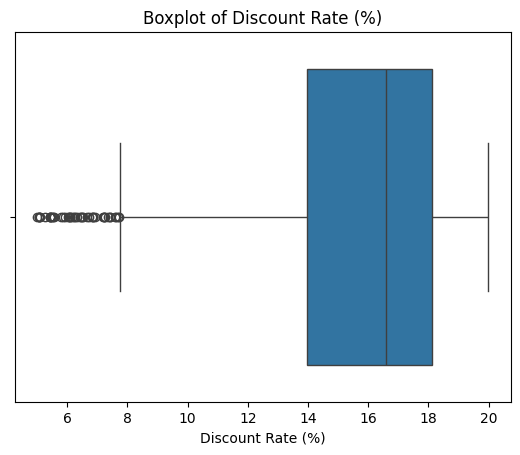

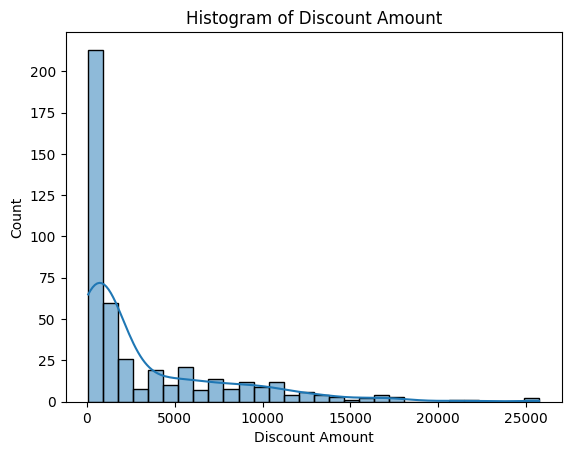

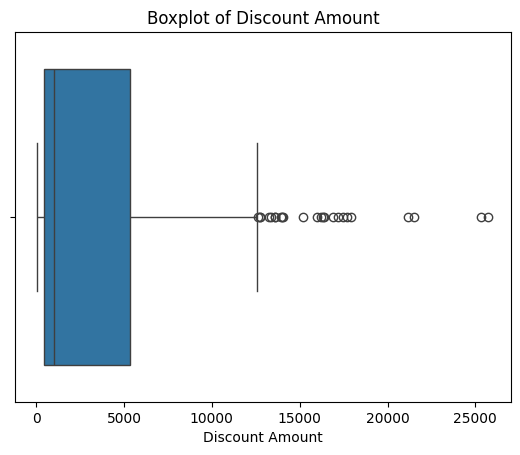

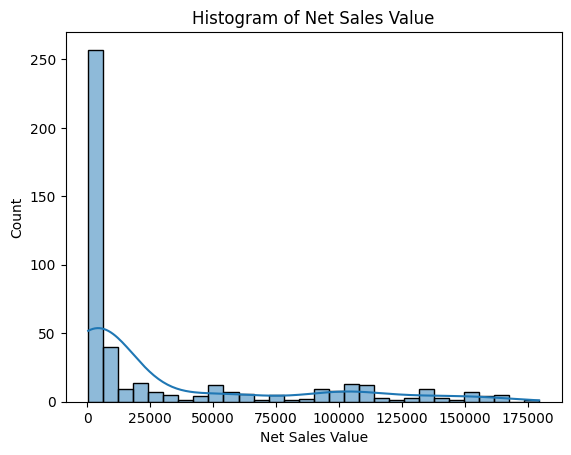

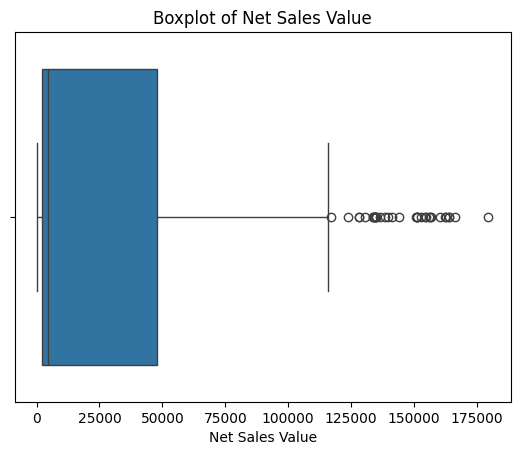

In [ ]:
# Data Visualization
plt.figure(figsize=(12, 6))
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.show()

    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
# Handling missing values
print("\nMissing Values Before Handling:")
print(df.isnull().sum())


Missing Values Before Handling:
Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64


In [ ]:
missing_values = df.isnull().sum()

for col in numerical_cols: # Iterate over numeric columns specified in num_cols
    df[col].fillna(df[col].median(), inplace=True) # Fill NaNs with median for each numeric column

print("Missing values handled successfully.")

Missing values handled successfully.


<ipython-input-10-d343f87dfb4d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True) # Fill NaNs with median for each numeric column


In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardization: Z-score normalization
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

<Figure size 1200x600 with 0 Axes>

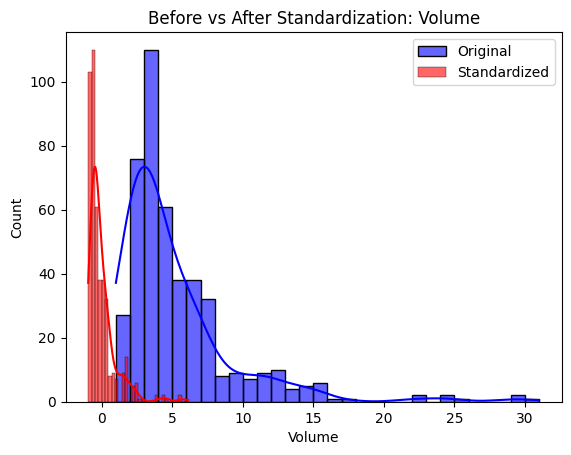

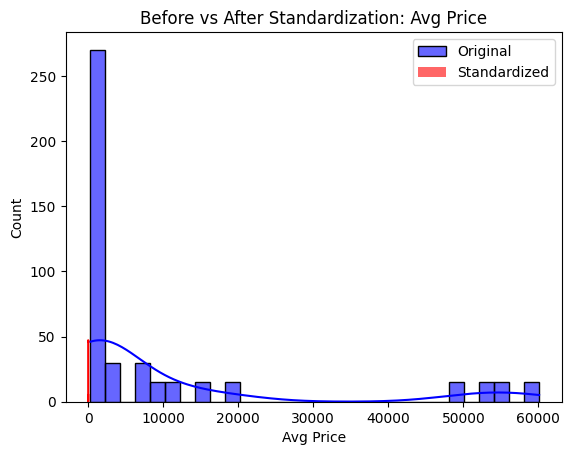

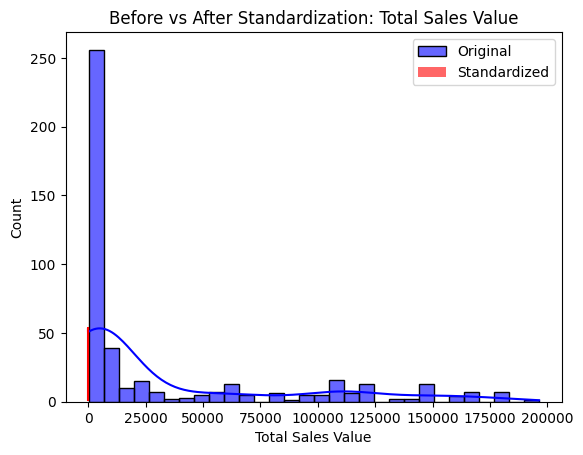

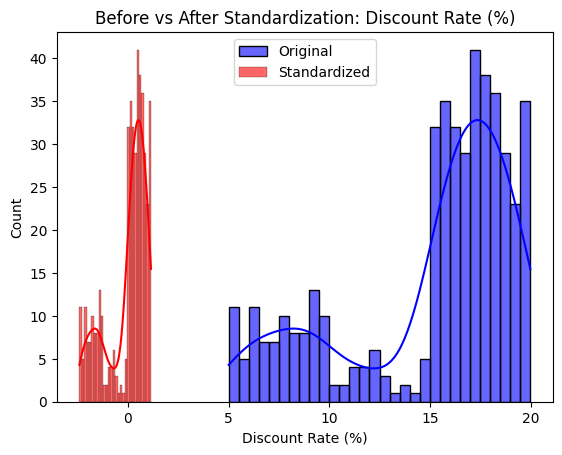

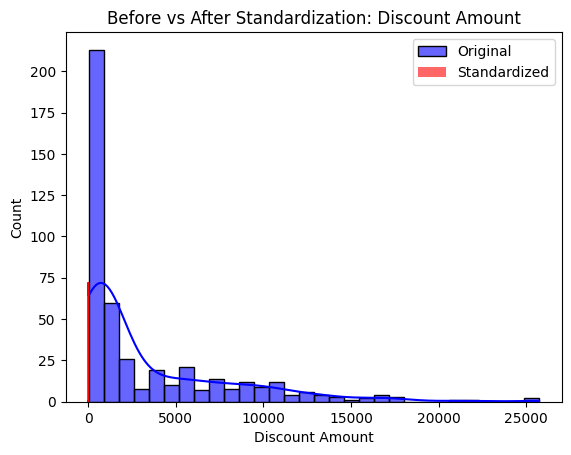

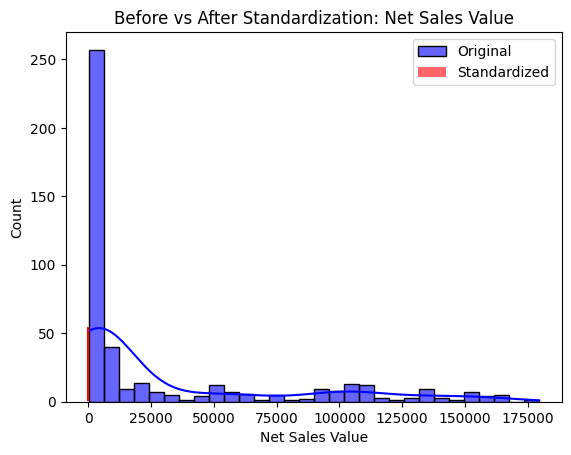

In [ ]:
# Before and After Distribution Comparison
plt.figure(figsize=(12, 6))
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30, color="blue", label="Original", alpha=0.6)
    sns.histplot(df_standardized[col], kde=True, bins=30, color="red", label="Standardized", alpha=0.6)
    plt.title(f'Before vs After Standardization: {col}')
    plt.legend()
    plt.show()

In [ ]:
# One-Hot Encoding for Categorical Columns : Converts categorical columns into binary (0 or 1) columns.
df_encoded = pd.get_dummies(df_standardized, columns=categorical_cols, drop_first=True)


In [ ]:
# Display transformed dataset
print("\nTransformed Dataset (First 5 Rows):")
print(df_encoded.head())


Transformed Dataset (First 5 Rows):
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0         2.804756            False            False            False   
1         1.271026            False            False            False   
2         1.545675            False            False            False   
3         1.765810            False            False            False   
4        -0.227595            False            False            False   

   Date_05-04-2021  ...  Model_Vedic 

In [ ]:
# Save the transformed dataset
df_encoded.to_csv("processed_sales_data.csv", index=False)
print("\nProcessed dataset saved as 'processed_sales_data.csv'.")


Processed dataset saved as 'processed_sales_data.csv'.
